In [30]:
%matplotlib inline

import os
import sys
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

from utils import GLOBAL, functions

In [31]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('chained_assignment', None)

In [32]:
#Import yearly stats
stats_df = pd.read_csv(GLOBAL.STATS_2020)

#Override FantasyPoints Column with your League scoring
stats_df['FantasyPoints'] = functions.scoringCalculator(
    stats_df['Rec'], stats_df['ReceivingYds'], stats_df['ReceivingTD'], stats_df['FumblesLost'], stats_df['RushingYds'], stats_df['RushingTD'], stats_df['PassingYds'], stats_df['PassingTD'], stats_df['Int'], GLOBAL.PPR_SCORING
)

In [33]:
#Set Pts/G
stats_df['Pts/G'] = round((stats_df['FantasyPoints'] / stats_df['G']), 2)

#Set Usage/G (Tgts + RushingAtt)
stats_df['Usage/G'] = round((stats_df['Tgt'] + stats_df['RushingAtt']) / stats_df['G'], 2)

In [34]:
#Set up separate DFs by Pos
rb_stats_df = stats_df[stats_df['Pos'] == 'RB']
wr_stats_df = stats_df[stats_df['Pos'] == 'WR']
te_stats_df = stats_df[stats_df['Pos'] == 'TE']
qb_stats_df = stats_df[stats_df['Pos'] == 'QB']

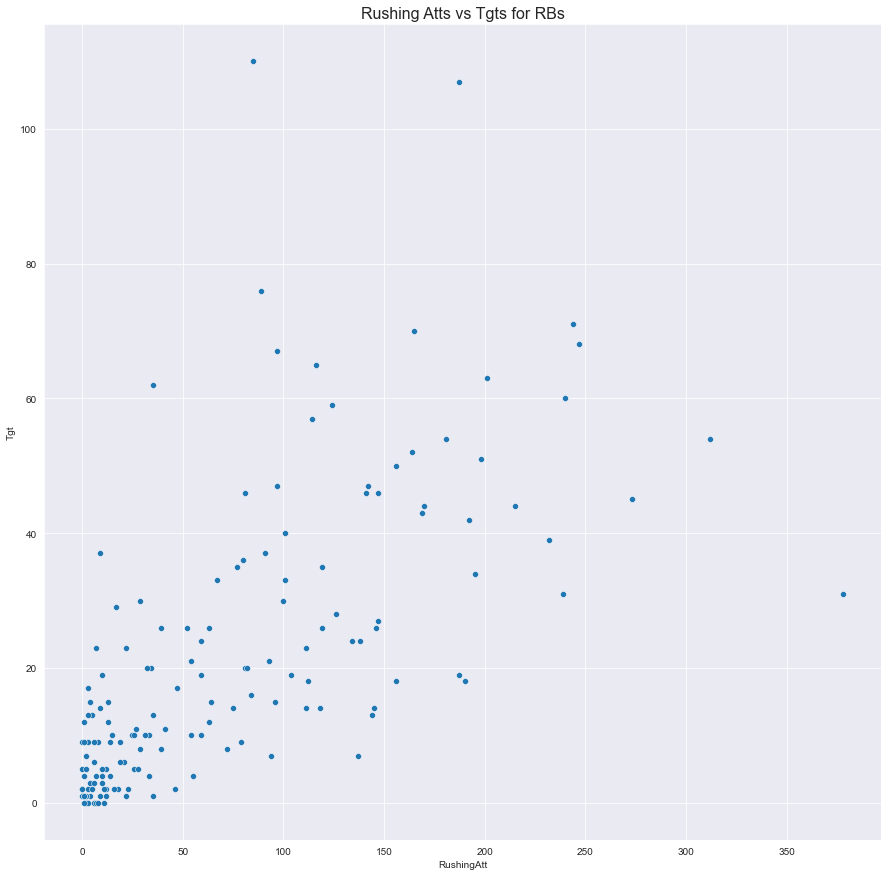

In [35]:
#Rushing Attempts vs Targets for RBs
sns.set_style('darkgrid')

plt.figure(figsize=(15, 15))
plt.title('Rushing Atts vs Tgts for RBs', fontsize=16)

sns.scatterplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt']);

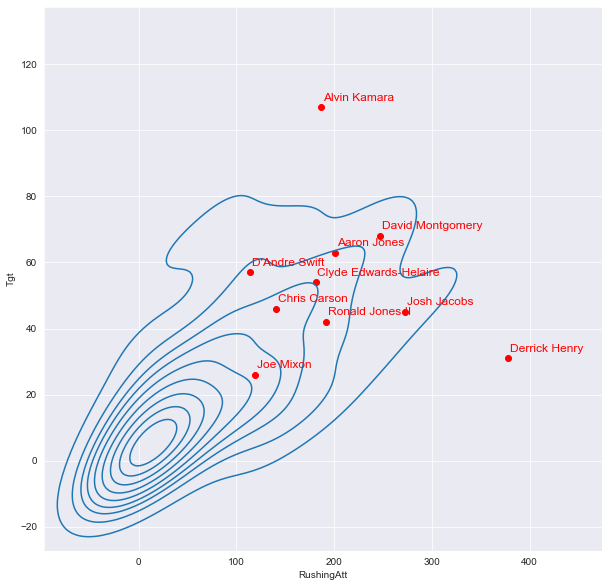

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))

notable_players = ['Derrick Henry', 'Alvin Kamara', 'Johnathan Taylor', 'Miles Sander', 'Aaron Jones', 'Josh Jacobs', 'Chris Carson', 'Joe Mixon', 'Ronald Jones II', 'D\'Andre Swift', 'David Montgomery', 'Clyde Edwards-Helaire']

for player_name in notable_players:
    player = rb_stats_df[rb_stats_df['Player'] == player_name]

    if not player.empty:
        targets = player['Tgt']
        rushes = player['RushingAtt']

        ax.annotate(player_name, xy=(rushes+2, targets+2), color='red', fontsize=12)
        ax.scatter(rushes, targets, color='red')

sns.kdeplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt']);

<Figure size 1080x1080 with 0 Axes>

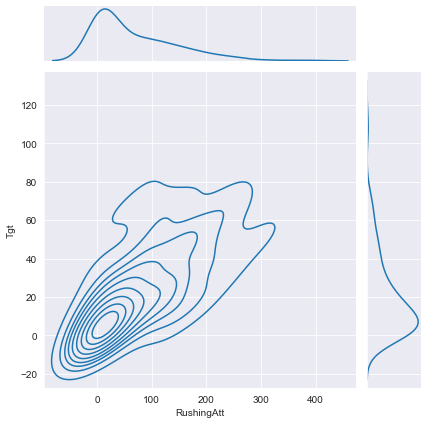

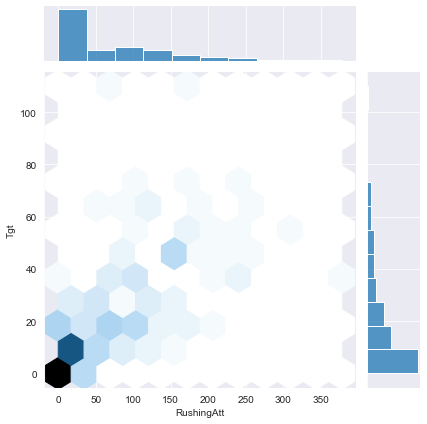

In [37]:
plt.figure(figsize=(15, 15))

sns.jointplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt'], kind='kde');

sns.jointplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt'], kind='hex');

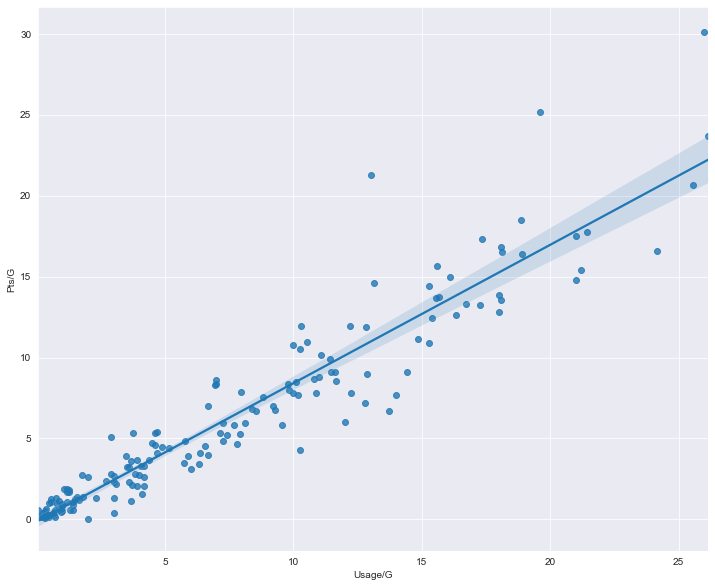

In [38]:
#RB Usage/G vs Pts/G Regression Plot
plt.figure(figsize=(12, 10))

sns.regplot(x=rb_stats_df['Usage/G'], y=rb_stats_df['Pts/G']);

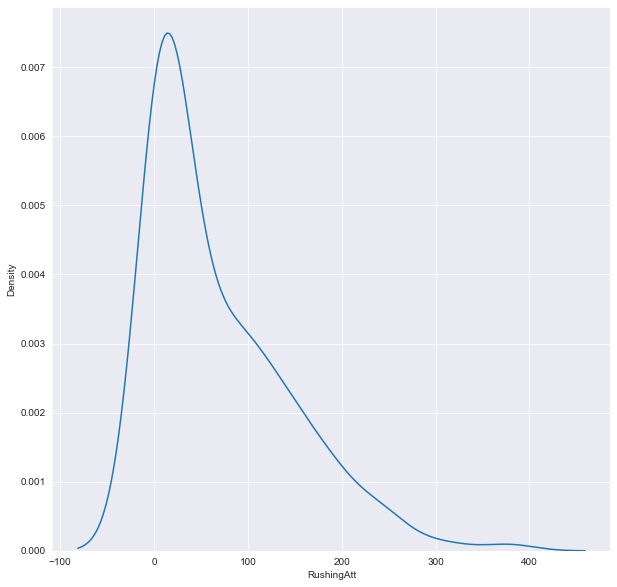

In [39]:
#Dist of RB carries
plt.figure(figsize=(10, 10))
sns.kdeplot(rb_stats_df['RushingAtt']);

<Figure size 720x720 with 0 Axes>

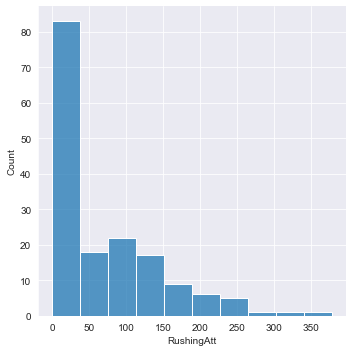

In [40]:
plt.figure(figsize=(10, 10))
sns.displot(rb_stats_df['RushingAtt']);

<Figure size 720x720 with 0 Axes>

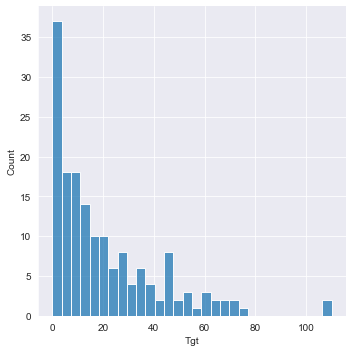

In [41]:
plt.figure(figsize=(10, 10))
sns.displot(rb_stats_df['Tgt'], bins=30);

<Figure size 720x720 with 0 Axes>

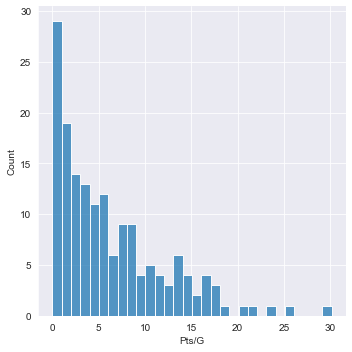

In [42]:
#FFPts/G for RBs
plt.figure(figsize=(10, 10))
sns.displot(rb_stats_df['Pts/G'], bins=30);

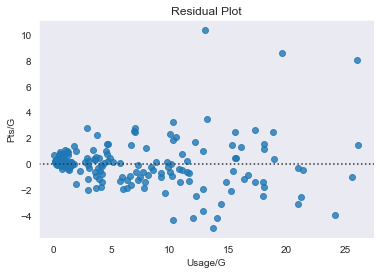

In [43]:
sns.set_style('dark')
sns.residplot(x=rb_stats_df['Usage/G'], y=rb_stats_df['Pts/G'])
plt.title('Residual Plot')
plt.xlabel('Usage/G')
plt.ylabel('Pts/G');

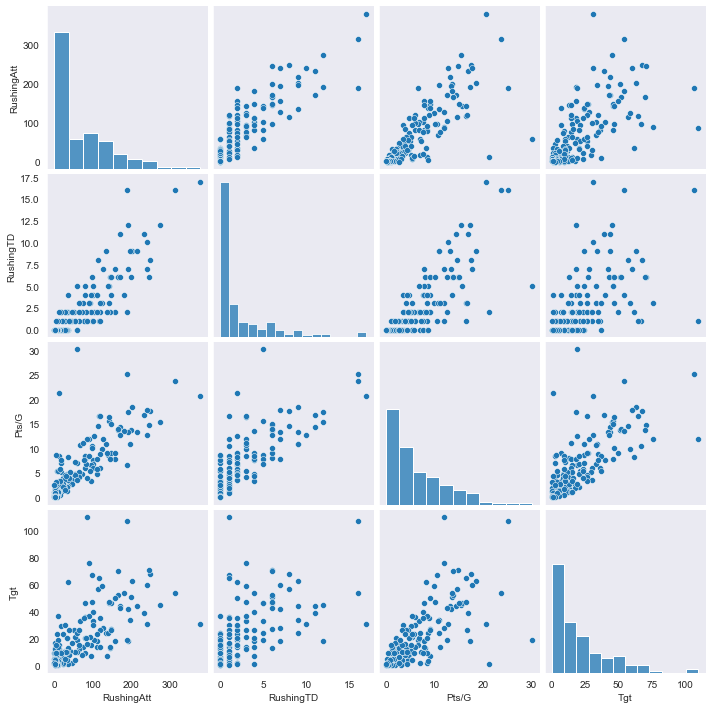

In [44]:
rb_stats_df_copy = rb_stats_df[[
    'RushingAtt',
    'RushingTD',
    'Pts/G',
    'Tgt'
]]

sns.pairplot(rb_stats_df_copy)

In [45]:
final_df = pd.DataFrame()

final_df = functions.scoreByWeek(final_df, '2019', 1, 18)

In [46]:
lamar_jackson = final_df.loc[final_df['Player'] == 'Lamar Jackson']
patrick_mahomes = final_df.loc[final_df['Player'] == 'Patrick Mahomes']
russell_wilson = final_df.loc[final_df['Player'] == 'Russell Wilson']

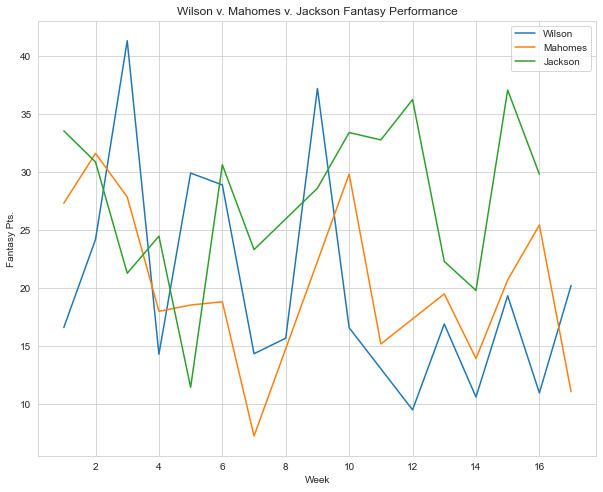

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.plot(russell_wilson['Week'], russell_wilson['StandardFantasyPoints'])
plt.plot(patrick_mahomes['Week'], patrick_mahomes['StandardFantasyPoints'])
plt.plot(lamar_jackson['Week'], lamar_jackson['StandardFantasyPoints'])
plt.legend(['Wilson', 'Mahomes', 'Jackson'])
plt.xlabel('Week')
plt.ylabel('Fantasy Pts.')
plt.title('Wilson v. Mahomes v. Jackson Fantasy Performance');

In [48]:
lamar_jackson.corr()[['StandardFantasyPoints']]

,StandardFantasyPoints
PassingYds,0.415339
PassingTD,0.625982
Int,-0.698805
PassingAtt,-0.313310
Cmp,-0.086869
RushingAtt,-0.295666
RushingYds,0.139054
RushingTD,-0.090980
Rec,NaN
Tgt,NaN


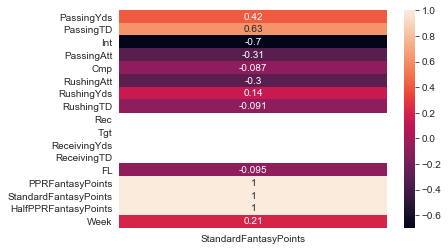

In [49]:
sns.heatmap(lamar_jackson.corr()[['StandardFantasyPoints']], annot=True);

In [62]:
stats_df['Usage/G'] = (stats_df['RushingAtt'] + stats_df['PassingAtt'] + stats_df['Tgt']) / stats_df['G']

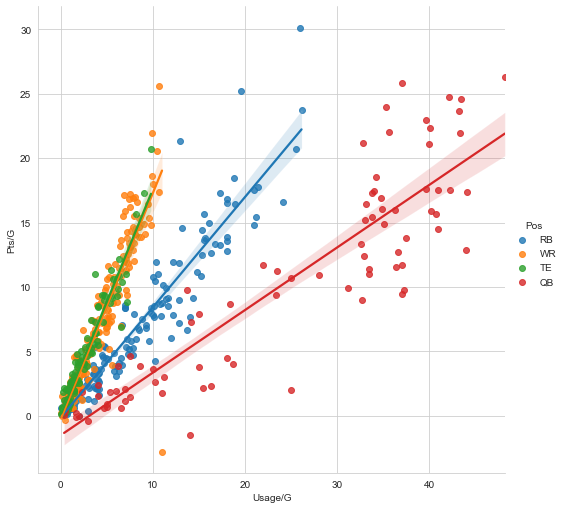

In [66]:
sns.lmplot(data=stats_df, x='Usage/G', y='Pts/G', hue='Pos', height=7);

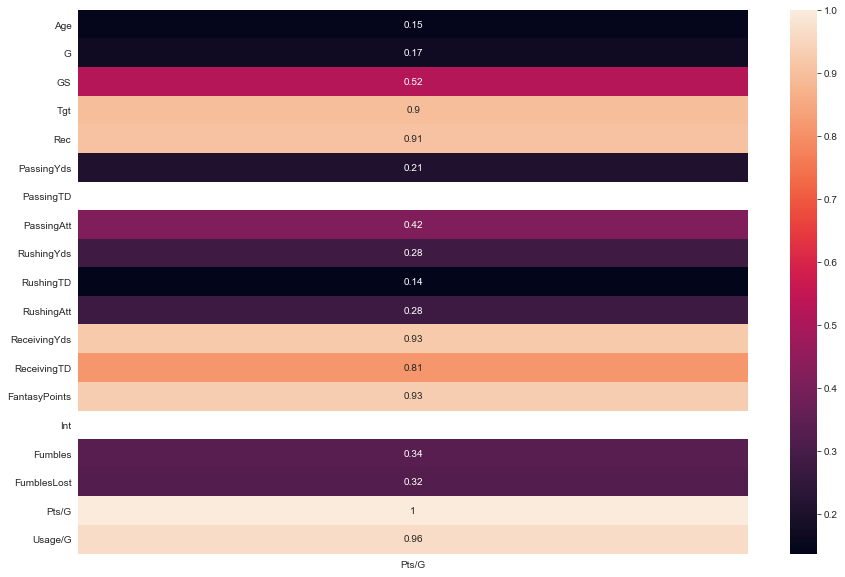

In [72]:
te_corr = stats_df[stats_df['Pos'] == 'TE'].corr()[['Pts/G']]

plt.figure(figsize=(15, 10))

sns.heatmap(te_corr, annot=True);

In [74]:
COMBINE_URL = "https://raw.githubusercontent.com/fantasydatapros/data/master/combine/combine00to20.csv"

"""
The first two columns of this CSV file are messed up. Using iloc to grab all rows (:), and then grab the column indexed at 2 (so the third column), all the way to the last.
"""
combine_df = pd.read_csv(COMBINE_URL).iloc[:, 2:] # this is subject to change as I clean the data

In [75]:
combine_df.groupby('Pos')['40YD'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,209.0,4.813445,0.176743,4.33,4.71,4.82,4.91,5.37
RB,414.0,4.536739,0.102188,4.24,4.46,4.54,4.60,4.84
TE,268.0,4.755784,0.137573,4.37,4.66,4.77,4.84,5.06
WR,612.0,4.493513,0.097411,4.22,4.42,4.50,4.56,4.79


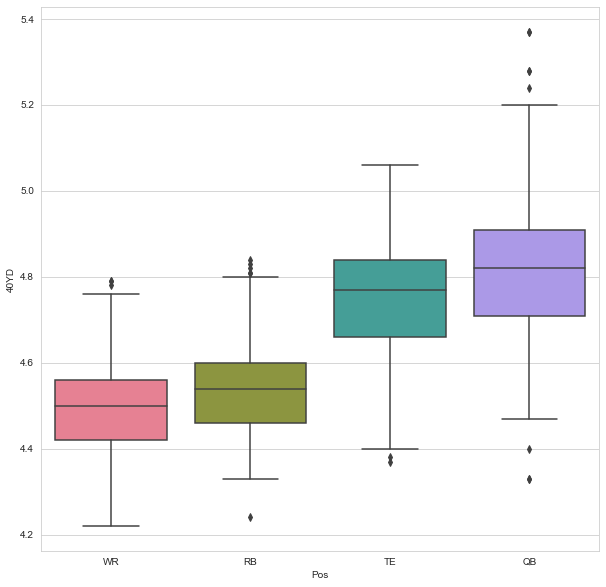

In [77]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pos', y='40YD', data=combine_df, palette=sns.color_palette('husl', n_colors=4));